<img src="logo.jpg" />

## [Prof. Pedram Jahangiry](https://huntsman.usu.edu/directory/jahangiry-pedram) 
[GitHub account](https://github.com/PJalgotrader) 

[YouTube Channel](https://www.youtube.com/channel/UCNDElcuuyX-2pSatVBDpJJQ/playlists) 

# Unsupervised Learning: Principle Component Analysis (PCA) 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()  #if you want to use seaborn themes with matplotlib functions
import warnings
warnings.filterwarnings('ignore')

In [2]:
rand_state= 1000

--- 
## PCA application: Wine dataset
* The dataset is called wine and it is a famous one in Machine Learning community. 
* More on wine data set: http://archive.ics.uci.edu/ml/datasets/wine

In [3]:
df = pd.read_csv('Wine.csv')

In [4]:
df.head()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline,Customer_Segment
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,1
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,1
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,1
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,1
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,1


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
Alcohol                 178 non-null float64
Malic_Acid              178 non-null float64
Ash                     178 non-null float64
Ash_Alcanity            178 non-null float64
Magnesium               178 non-null int64
Total_Phenols           178 non-null float64
Flavanoids              178 non-null float64
Nonflavanoid_Phenols    178 non-null float64
Proanthocyanins         178 non-null float64
Color_Intensity         178 non-null float64
Hue                     178 non-null float64
OD280                   178 non-null float64
Proline                 178 non-null int64
Customer_Segment        178 non-null int64
dtypes: float64(11), int64(3)
memory usage: 19.5 KB


In [6]:
df['Customer_Segment'].value_counts()

2    71
1    59
3    48
Name: Customer_Segment, dtype: int64

In [7]:
df.groupby(['Customer_Segment']).mean().round(2)

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
Customer_Segment,,,,,,,,,,,,,
1,13.74,2.01,2.46,17.04,106.34,2.84,2.98,0.29,1.90,5.53,1.06,3.16,1115.71
2,12.28,1.93,2.24,20.24,94.55,2.26,2.08,0.36,1.63,3.09,1.06,2.79,519.51
3,13.15,3.33,2.44,21.42,99.31,1.68,0.78,0.45,1.15,7.40,0.68,1.68,629.90


In [8]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X = df.drop('Customer_Segment', axis=1, inplace=False)
X = sc.fit_transform(X)

In [9]:
X.shape

(178, 13)

## PCA with SKlearn

In [10]:
from sklearn.decomposition import PCA

In [11]:
pca=PCA(n_components=13)
pca.fit(X)

PCA(n_components=13)

In [12]:
pca

PCA(n_components=13)

In [13]:
pca.n_features_

13

In [14]:
pca.n_components_

13

In [15]:
# loadings
loadings = pca.components_
loadings.shape

(13, 13)

In [16]:
# let's look at the first 2 PC loadings
loadings[0:2]

array([[ 0.1443294 , -0.24518758, -0.00205106, -0.23932041,  0.14199204,
         0.39466085,  0.4229343 , -0.2985331 ,  0.31342949, -0.0886167 ,
         0.29671456,  0.37616741,  0.28675223],
       [-0.48365155, -0.22493093, -0.31606881,  0.0105905 , -0.299634  ,
        -0.06503951,  0.00335981, -0.02877949, -0.03930172, -0.52999567,
         0.27923515,  0.16449619, -0.36490283]])

In [17]:
# scores 
scores= pca.fit_transform(X)
scores.shape

(178, 13)

----
### Proportion Variance Explained - Scree plot

There are 3 different ways to calculate the PVE:
1. built in method from sklearn PCA (this doesn't work for Kernel PCA)
2. finding the contribution of each eigenvalue to the sum of all eigenvalues (this also doesn't work for Kernel PCA)
3. finding the PVE by looking at proportional variance in the scores (this works for Kernel PCA :)

In [18]:
# 1 built in method from sklearn PCA (this doesn't work for Kernel PCA)
pca.explained_variance_ratio_

array([0.36198848, 0.1920749 , 0.11123631, 0.0706903 , 0.06563294,
       0.04935823, 0.04238679, 0.02680749, 0.02222153, 0.01930019,
       0.01736836, 0.01298233, 0.00795215])

- - - 
2. finding the contribution of each eigenvalue to the sum of all eigenvalues (this also doesn't work for Kernel PCA)


In [19]:
cov=pca.get_covariance()

In [20]:
from numpy import linalg

In [21]:
eigval , eigvec = linalg.eig(cov)

In [22]:
eigval

array([4.73243698, 2.51108093, 1.45424187, 0.92416587, 0.85804868,
       0.64528221, 0.55414147, 0.10396199, 0.35046627, 0.16972374,
       0.29051203, 0.22706428, 0.25232001])

In [23]:
eigval/sum(eigval)

array([0.36198848, 0.1920749 , 0.11123631, 0.0706903 , 0.06563294,
       0.04935823, 0.04238679, 0.00795215, 0.02680749, 0.01298233,
       0.02222153, 0.01736836, 0.01930019])

--- 

3. finding the PVE by looking at proportional variance in the scores. This is true because the Var(sum pca) = sum Var

In [24]:

scores = pca.fit_transform(X)

In [25]:
score_var = np.var(scores,axis=0)
score_var

array([4.70585025, 2.49697373, 1.44607197, 0.91897392, 0.85322818,
       0.64165703, 0.55102831, 0.34849736, 0.28887994, 0.25090248,
       0.22578864, 0.16877023, 0.10337794])

In [26]:
score_var/ sum(score_var)

array([0.36198848, 0.1920749 , 0.11123631, 0.0706903 , 0.06563294,
       0.04935823, 0.04238679, 0.02680749, 0.02222153, 0.01930019,
       0.01736836, 0.01298233, 0.00795215])

----

In [27]:
PVE=pd.DataFrame({'Principal Component':range(1,pca.n_components+1), 'PVE':pca.explained_variance_ratio_ })
PVE['cum_PVE']= np.cumsum(PVE['PVE'])
PVE.head(7)

,Principal Component,PVE,cum_PVE
0,1,0.361988,0.361988
1,2,0.192075,0.554063
2,3,0.111236,0.665300
3,4,0.070690,0.735990
4,5,0.065633,0.801623
5,6,0.049358,0.850981
6,7,0.042387,0.893368


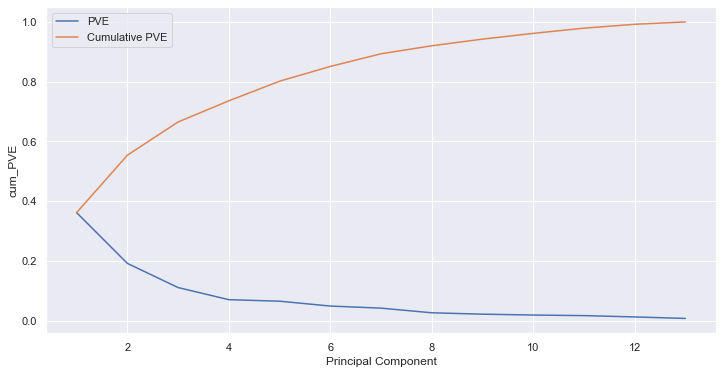

In [28]:
plt.figure(figsize=(12,6))
sns.lineplot(x='Principal Component', y='PVE', data=PVE)
sns.lineplot(x='Principal Component', y='cum_PVE', data=PVE)
plt.legend(['PVE','Cumulative PVE'])
plt.show()

It seems that the optimal number of PC is 6. With 6 PCs, almost 85% of variations are explained.

## PCA Application
Now let's say we want to use PC as preprocessing the data for using a supervised ML model (logistic regression for example). Remember, the targer variable is Customer_Segment with 3 classes. For illustration purposes we will use PC=2 and look at our classification boundary!

###  Logistic regressions  (X = 13 All the Features)

In [29]:
from sklearn.linear_model import LogisticRegression

In [30]:
y = df['Customer_Segment']
X = df.drop('Customer_Segment', axis=1, inplace=False)

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=rand_state)

X_train =sc.fit_transform(X_train)
X_test =sc.fit_transform(X_test)

In [31]:
# Fitting Logistic Regression to the Training set
logistic = LogisticRegression(multi_class='auto')
logistic.fit(X_train, y_train)

LogisticRegression()

In [32]:
# Predicting the Test set results
y_pred_test = logistic.predict(X_test)

### the Confusion Matrix 

In [33]:
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score

In [34]:
confusion_matrix(y_test, y_pred_test)

array([[ 9,  0,  0],
       [ 1, 16,  1],
       [ 0,  0,  9]], dtype=int64)

In [35]:
accuracy_score(y_test, y_pred_test)

0.9444444444444444

In [36]:
f1_score(y_test,y_pred_test, average='weighted')

0.9442724458204333

###  Logistic regressions  
For visualization purposes only we pick (PC = 2 explaining 55% of variations in X)

In [37]:
pca=PCA(n_components=2)
PC_train= pca.fit_transform(X_train)
PC_test=pca.transform(X_test)

In [38]:
logistic.fit(PC_train, y_train)

# Predicting the Test set results
y_pred_test = logistic.predict(PC_test)

In [39]:
confusion_matrix(y_test, y_pred_test)

array([[ 9,  0,  0],
       [ 1, 16,  1],
       [ 0,  0,  9]], dtype=int64)

In [40]:
accuracy_score(y_test, y_pred_test)

0.9444444444444444

In [41]:
f1_score(y_test,y_pred_test, average='weighted')

0.9442724458204333

Wow!!! we got the same accuracy in the test set by using only 2 PC instead of 13 X. **This was pure chance and not common**.

**Exercise**: 

1. Try n_components=3! why the accuracy descreased? what's going on?  
2. Try n_components=max features =13! what do you expect to see for accuracy? PCA with max features is basically transforming all the features without reducing the dimension. The model performance should not change. 

### Advance Visualization (this part is optional) 

Visualising the Training set results (in 2D of course!).

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


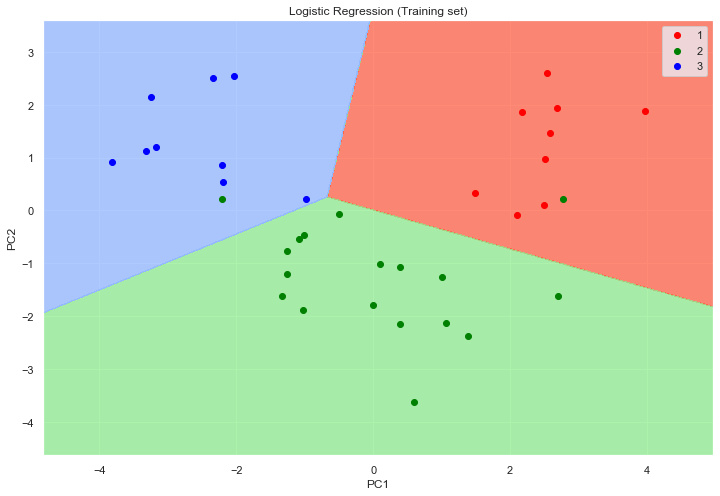

In [42]:
plt.figure(figsize=(12,8))
from matplotlib.colors import ListedColormap
X_set, y_set = PC_test, y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, logistic.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('#FF6347', '#90EE90','#94b9ff')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green', 'blue'))(i), label = j)
plt.title('Logistic Regression (Training set)')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend()
plt.show()

In [43]:
confusion_matrix(y_test, y_pred_test)

array([[ 9,  0,  0],
       [ 1, 16,  1],
       [ 0,  0,  9]], dtype=int64)

###  Additional links:
1. PCA sklearn documentation: https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html
2. PCA visualization: https://setosa.io/ev/principal-component-analysis/
3. Kernel PCA sklearn documentation: https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.KernelPCA.html#sklearn.decomposition.KernelPCA
4. Kernel PCA visualization: https://scikit-learn.org/stable/auto_examples/decomposition/plot_kernel_pca.html#sphx-glr-auto-examples-decomposition-plot-kernel-pca-py
5. What is Singular Value Decomposition (SVD): https://www.youtube.com/watch?v=mBcLRGuAFUk